In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
#import sys
import pickle
import itertools
import statsmodels.api as sm
from scipy import interpolate

In [3]:
from sabreMod import sosf,sosfn,acf,sosfh
from sabre import sosfw

In [4]:
samples=pd.read_csv('Data//listdata.csv',header=None)
samples

,0
0,30DorXH
1,595ISISH
2,595TAUH
3,604ISISH
4,604TAUH
5,HVTAUH
6,HXTAUH
7,M42HaenelH
8,M8XH
9,N3372XH


In [5]:
xxx=6

In [6]:
d=[49000,840000,840000,840000,840000,500000,500000,412,1250,2600]
d[xxx]

500000

In [7]:
pc=d[xxx]*(4.85*10**(-6))
pc

2.425

In [8]:
dt=pd.read_csv('Data//'+samples[0][xxx]+'.csv')
#dt=pd.read_csv('datos Car.csv')
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
#os.remove(datap)
dt.describe()

,Y,X,RV,I
count,1256.000000,1256.000000,1256.000000,1256.000000
mean,26.265127,22.535032,-6.176871,3.052743
std,11.464781,9.960098,3.395018,1.219931
min,3.000000,3.000000,-15.492500,1.182500
25%,18.000000,15.000000,-8.392500,1.909375
50%,25.000000,22.000000,-6.158750,2.975000
75%,35.000000,30.000000,-3.662500,4.080625
max,59.000000,48.000000,3.827500,6.237500


(0.75, 50.25, 0.19999999999999973, 61.8)

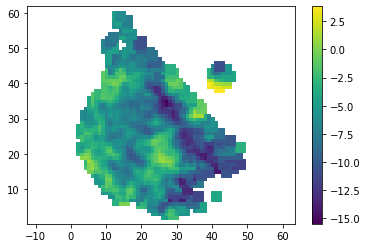

In [9]:
plt.scatter(dt.X,dt.Y,c=dt.RV, s=100,marker='s')
plt.colorbar()
plt.axis('equal')

1.0


[None, None]

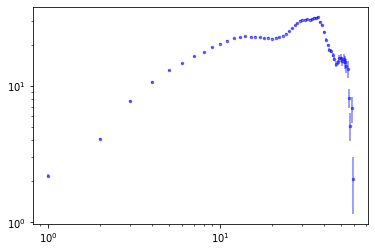

In [10]:
SF=sosf(dt)

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)
ax.set(xscale='log',yscale='log')

In [11]:
x=SF['Lag']
y=SF['Nmqvd']-2*(dt.RV.std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([22.75595935, 40.53254361])

In [12]:
s=SFr[0]-10

In [13]:
ss=np.round(2*(dt.RV.std())**2,2)

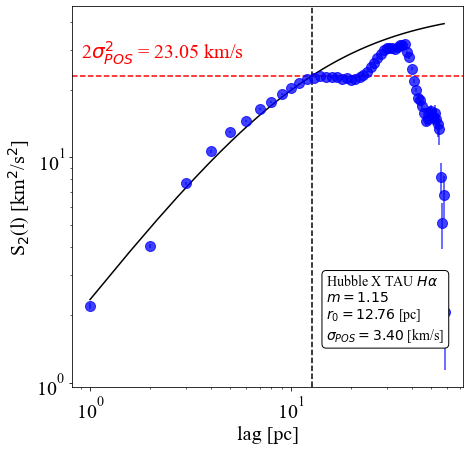

In [17]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=2*(dt.RV.std())**2, color='r', linestyle='--')
ax.text(0.23, 0.88,'2$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.15

x=np.linspace(1,int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*2*(dt.RV.std())**2

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('Hubble X TAU ' r'$H\alpha$', r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (dt.RV.std()) + ' [km/s]'))#,r'$σ_{LOS}=%.2f$'%(dt.Sig.std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

fig.savefig(samples[0][xxx]+'.pdf')

In [15]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 12.239779233932495 seconds ---
